In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine,correlation

In [34]:
df=pd.read_csv("C:\\Users\\user\\Downloads\\book_rs.csv",encoding='latin-1')

In [35]:
pd.options.display.max_columns=500

In [36]:
df.head()

,Unnamed: 0,User.ID,Book.Title,Book.Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6


In [37]:
df.shape

(10000, 4)

In [38]:
data=df.iloc[:,1:]

In [39]:
data.sort_values(['User.ID'])

,User.ID,Book.Title,Book.Rating
2401,8,Wings,5
2400,8,The Western way: A practical guide to the West...,5
2399,8,Ancient Celtic Romances,5
2402,8,Truckers,5
2405,8,The Art Of Celtia,7
...,...,...,...
2395,278854,La crÃ³nica del PerÃº (CrÃ³nicas de AmÃ©rica),7
2398,278854,Celtic Mythology (Library of the World's Myths...,8
2393,278854,A corrente de Trewis Scott,7
2394,278854,As valkÃ­rias,7


<AxesSubplot:>

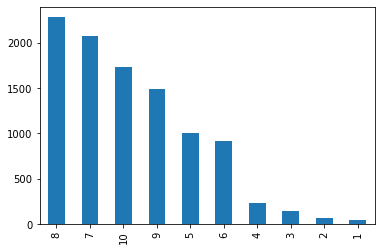

In [40]:
data['Book.Rating'].value_counts().plot(kind='bar')

In [41]:
data.isna().sum()

User.ID        0
Book.Title     0
Book.Rating    0
dtype: int64

In [42]:
len(data['User.ID'].unique())

2182

In [43]:
len(data['Book.Title'].unique())

9659

In [44]:
book_df=data.pivot_table(index='User.ID',columns='Book.Title',values='Book.Rating').reset_index(drop=True)

In [45]:
book_df

Book.Title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",1001 Brilliant Ways to Checkmate,101 Bright Ideas: Esl Activities for All Ages,101 Dalmatians,101 Essential Tips: House Plants,101 Telephone Jokes,101 Wacky Computer Jokes,101 Ways to Make Money at Home,11 Edward Street,11th Hour,13 99 Euros,"14,000 Things to Be Happy About",1984,1st to Die: A Novel,20 Jahre 40 bleiben. Jung und schÃ?Â¶n in den besten Jahren.,20 Years of Censored News,"20,000 Leagues Under the Sea (Wordsworth Collection)","20,001 Names for Baby",2001 Spanish and English Idioms/2001 Modismos Espanoles E Ingleses: 2001 Modismos Espanoles E Ingleses,2010: Odyssey Two,2061: Odyssey Three,22 Indigo Place,24 Hours,250 Things You Can Do to Make Your Cat Adore You,253,28 Barbary Lane : A \Tales of the City\ Omnibus,2nd Chance,3 Bowls : Vegetarian Recipes from an American Zen Buddhist Monastery,"3 Plays: Our Town, the Skin of Our Teeth, the Matchmaker (Perennial Classics)",30 Things Everyone Should Know How to Do Before Turning 30,30-Minute Meals,30: Pieces of a Novel,365 Easy Low-Calorie Recipes,365 Health and Happiness Boosters,4 Blondes,"40 Tons Of Trouble (Women Who Dare) (Harlequin Super Romance, No 726)","5 Novels : Alan Mendelsohn, the Boy from Mars; Slaves of Spiegel; The Last Guru; Young Adult Novel; The Snarkout Boys and the Avocado of Death",50 Simple Things You Can Do to Save the Earth,500 palabras nuevas para ti / 500 Words To Grow On,66 Laps: A Novel,7b,8 Steps to a Healthy Heart: The Complete Guide to Heart Disease Prevention and Recovery from Heart Attack and Bypass Surgery,8 Weeks to Optimum Health,97 Ways to Make A Baby Laugh,99 francs: Roman,A 3rd Serving of Chicken Soup for the Soul (Chicken Soup for the Soul Series (Paper)),A 4th Course of Chicken Soup for the Soul: 101 More Stories to Open the Heart and Rekindle the Spirit,A 6th Bowl of Chicken Soup for the Soul (Chicken Soup for the Soul),"A BEAUTIFUL MIND: A Biography of John Forbes Nash, Jr., Winner of the Nobel Prize in Economics, 1994","A Baby For Lord Roderick (Royal Flash) (Harlequin American Romance, No. 926)",A Basic Guide to Archery (An Official U.S. Olympic Committee Sports Series),"A Beautiful Mind : A Biography of John Forbes Nash, Jr.",A Beautiful Mind: The Life of Mathematical Genius and Nobel Laureate John Nash,A Bend in the Road,A Big New Free Happy Unusual Life: Self-Expression and Spiritual Practice for Those Who Have Time for Neither,A Bigamist's Daughter,A Blip in the Continuum (Macintosh Version),A Bloody Field by Shrewsbury,A Book of Blessings,A Boy Named Phyllis: A Suburban Memoir,A Break with Charity: A Story about the Salem Witch Trials,A Bridge to Wiseman's Cove (Uqp Young Adult Fiction),A Brief History of Qi,A Brief History of Time : The Updated and Expanded Tenth Anniversary Edition,A Burning Obsession (Blaze),A Cabinet of Medical Curiosities,"A Call to Conscience : The Landmark Speeches of Dr. Martin Luther King, Jr.",A Careful Wife,A Caribbean Mystery,A Case of Conscience (Del Rey Impact),A Cat in the Manger: An Alice Nestleton Mystery (Alice Nestleton Mysteries (Paperback)),A Certain Justice: A Novel,"A Chakra &amp; Kundalini Workbook: Psycho-Spiritual Techniques for Health, Rejuvenation, Psychic Powers and Spiritual Realization",A Charles Williams Reader,A Child Called \It\: One Child's Courage to Survive,A Child's Called It and The Lost Boy,A Child's Night Dream,A Christmas Carol (Great Stories),A Christmas Carol (Scholastic Classics),A Christmas Story,A Christmas Story : The Book That Inspired the Hilarious Classic Film,A Circle of Silver (Circle of Silver Chronicles),A City in Winter,A Civil Action,"A Clash of Kings (A Song of Fire and Ice, Boo

In [46]:
book_df.fillna(0,inplace=True)

In [47]:
book_df

Book.Title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",1001 Brilliant Ways to Checkmate,101 Bright Ideas: Esl Activities for All Ages,101 Dalmatians,101 Essential Tips: House Plants,101 Telephone Jokes,101 Wacky Computer Jokes,101 Ways to Make Money at Home,11 Edward Street,11th Hour,13 99 Euros,"14,000 Things to Be Happy About",1984,1st to Die: A Novel,20 Jahre 40 bleiben. Jung und schÃ?Â¶n in den besten Jahren.,20 Years of Censored News,"20,000 Leagues Under the Sea (Wordsworth Collection)","20,001 Names for Baby",2001 Spanish and English Idioms/2001 Modismos Espanoles E Ingleses: 2001 Modismos Espanoles E Ingleses,2010: Odyssey Two,2061: Odyssey Three,22 Indigo Place,24 Hours,250 Things You Can Do to Make Your Cat Adore You,253,28 Barbary Lane : A \Tales of the City\ Omnibus,2nd Chance,3 Bowls : Vegetarian Recipes from an American Zen Buddhist Monastery,"3 Plays: Our Town, the Skin of Our Teeth, the Matchmaker (Perennial Classics)",30 Things Everyone Should Know How to Do Before Turning 30,30-Minute Meals,30: Pieces of a Novel,365 Easy Low-Calorie Recipes,365 Health and Happiness Boosters,4 Blondes,"40 Tons Of Trouble (Women Who Dare) (Harlequin Super Romance, No 726)","5 Novels : Alan Mendelsohn, the Boy from Mars; Slaves of Spiegel; The Last Guru; Young Adult Novel; The Snarkout Boys and the Avocado of Death",50 Simple Things You Can Do to Save the Earth,500 palabras nuevas para ti / 500 Words To Grow On,66 Laps: A Novel,7b,8 Steps to a Healthy Heart: The Complete Guide to Heart Disease Prevention and Recovery from Heart Attack and Bypass Surgery,8 Weeks to Optimum Health,97 Ways to Make A Baby Laugh,99 francs: Roman,A 3rd Serving of Chicken Soup for the Soul (Chicken Soup for the Soul Series (Paper)),A 4th Course of Chicken Soup for the Soul: 101 More Stories to Open the Heart and Rekindle the Spirit,A 6th Bowl of Chicken Soup for the Soul (Chicken Soup for the Soul),"A BEAUTIFUL MIND: A Biography of John Forbes Nash, Jr., Winner of the Nobel Prize in Economics, 1994","A Baby For Lord Roderick (Royal Flash) (Harlequin American Romance, No. 926)",A Basic Guide to Archery (An Official U.S. Olympic Committee Sports Series),"A Beautiful Mind : A Biography of John Forbes Nash, Jr.",A Beautiful Mind: The Life of Mathematical Genius and Nobel Laureate John Nash,A Bend in the Road,A Big New Free Happy Unusual Life: Self-Expression and Spiritual Practice for Those Who Have Time for Neither,A Bigamist's Daughter,A Blip in the Continuum (Macintosh Version),A Bloody Field by Shrewsbury,A Book of Blessings,A Boy Named Phyllis: A Suburban Memoir,A Break with Charity: A Story about the Salem Witch Trials,A Bridge to Wiseman's Cove (Uqp Young Adult Fiction),A Brief History of Qi,A Brief History of Time : The Updated and Expanded Tenth Anniversary Edition,A Burning Obsession (Blaze),A Cabinet of Medical Curiosities,"A Call to Conscience : The Landmark Speeches of Dr. Martin Luther King, Jr.",A Careful Wife,A Caribbean Mystery,A Case of Conscience (Del Rey Impact),A Cat in the Manger: An Alice Nestleton Mystery (Alice Nestleton Mysteries (Paperback)),A Certain Justice: A Novel,"A Chakra &amp; Kundalini Workbook: Psycho-Spiritual Techniques for Health, Rejuvenation, Psychic Powers and Spiritual Realization",A Charles Williams Reader,A Child Called \It\: One Child's Courage to Survive,A Child's Called It and The Lost Boy,A Child's Night Dream,A Christmas Carol (Great Stories),A Christmas Carol (Scholastic Classics),A Christmas Story,A Christmas Story : The Book That Inspired the Hilarious Classic Film,A Circle of Silver (Circle of Silver Chronicles),A City in Winter,A Civil Action,"A Clash of Kings (A Song of Fire and Ice, Boo

In [48]:
book_df.index=data['User.ID'].unique()

In [49]:
book_df

Book.Title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",1001 Brilliant Ways to Checkmate,101 Bright Ideas: Esl Activities for All Ages,101 Dalmatians,101 Essential Tips: House Plants,101 Telephone Jokes,101 Wacky Computer Jokes,101 Ways to Make Money at Home,11 Edward Street,11th Hour,13 99 Euros,"14,000 Things to Be Happy About",1984,1st to Die: A Novel,20 Jahre 40 bleiben. Jung und schÃ?Â¶n in den besten Jahren.,20 Years of Censored News,"20,000 Leagues Under the Sea (Wordsworth Collection)","20,001 Names for Baby",2001 Spanish and English Idioms/2001 Modismos Espanoles E Ingleses: 2001 Modismos Espanoles E Ingleses,2010: Odyssey Two,2061: Odyssey Three,22 Indigo Place,24 Hours,250 Things You Can Do to Make Your Cat Adore You,253,28 Barbary Lane : A \Tales of the City\ Omnibus,2nd Chance,3 Bowls : Vegetarian Recipes from an American Zen Buddhist Monastery,"3 Plays: Our Town, the Skin of Our Teeth, the Matchmaker (Perennial Classics)",30 Things Everyone Should Know How to Do Before Turning 30,30-Minute Meals,30: Pieces of a Novel,365 Easy Low-Calorie Recipes,365 Health and Happiness Boosters,4 Blondes,"40 Tons Of Trouble (Women Who Dare) (Harlequin Super Romance, No 726)","5 Novels : Alan Mendelsohn, the Boy from Mars; Slaves of Spiegel; The Last Guru; Young Adult Novel; The Snarkout Boys and the Avocado of Death",50 Simple Things You Can Do to Save the Earth,500 palabras nuevas para ti / 500 Words To Grow On,66 Laps: A Novel,7b,8 Steps to a Healthy Heart: The Complete Guide to Heart Disease Prevention and Recovery from Heart Attack and Bypass Surgery,8 Weeks to Optimum Health,97 Ways to Make A Baby Laugh,99 francs: Roman,A 3rd Serving of Chicken Soup for the Soul (Chicken Soup for the Soul Series (Paper)),A 4th Course of Chicken Soup for the Soul: 101 More Stories to Open the Heart and Rekindle the Spirit,A 6th Bowl of Chicken Soup for the Soul (Chicken Soup for the Soul),"A BEAUTIFUL MIND: A Biography of John Forbes Nash, Jr., Winner of the Nobel Prize in Economics, 1994","A Baby For Lord Roderick (Royal Flash) (Harlequin American Romance, No. 926)",A Basic Guide to Archery (An Official U.S. Olympic Committee Sports Series),"A Beautiful Mind : A Biography of John Forbes Nash, Jr.",A Beautiful Mind: The Life of Mathematical Genius and Nobel Laureate John Nash,A Bend in the Road,A Big New Free Happy Unusual Life: Self-Expression and Spiritual Practice for Those Who Have Time for Neither,A Bigamist's Daughter,A Blip in the Continuum (Macintosh Version),A Bloody Field by Shrewsbury,A Book of Blessings,A Boy Named Phyllis: A Suburban Memoir,A Break with Charity: A Story about the Salem Witch Trials,A Bridge to Wiseman's Cove (Uqp Young Adult Fiction),A Brief History of Qi,A Brief History of Time : The Updated and Expanded Tenth Anniversary Edition,A Burning Obsession (Blaze),A Cabinet of Medical Curiosities,"A Call to Conscience : The Landmark Speeches of Dr. Martin Luther King, Jr.",A Careful Wife,A Caribbean Mystery,A Case of Conscience (Del Rey Impact),A Cat in the Manger: An Alice Nestleton Mystery (Alice Nestleton Mysteries (Paperback)),A Certain Justice: A Novel,"A Chakra &amp; Kundalini Workbook: Psycho-Spiritual Techniques for Health, Rejuvenation, Psychic Powers and Spiritual Realization",A Charles Williams Reader,A Child Called \It\: One Child's Courage to Survive,A Child's Called It and The Lost Boy,A Child's Night Dream,A Christmas Carol (Great Stories),A Christmas Carol (Scholastic Classics),A Christmas Story,A Christmas Story : The Book That Inspired the Hilarious Classic Film,A Circle of Silver (Circle of Silver Chronicles),A City in Winter,A Civil Action,"A Clash of Kings (A Song of Fire and Ice, Boo

In [50]:
book_df.fillna(0,inplace=True)

In [51]:
book_df

Book.Title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",1001 Brilliant Ways to Checkmate,101 Bright Ideas: Esl Activities for All Ages,101 Dalmatians,101 Essential Tips: House Plants,101 Telephone Jokes,101 Wacky Computer Jokes,101 Ways to Make Money at Home,11 Edward Street,11th Hour,13 99 Euros,"14,000 Things to Be Happy About",1984,1st to Die: A Novel,20 Jahre 40 bleiben. Jung und schÃ?Â¶n in den besten Jahren.,20 Years of Censored News,"20,000 Leagues Under the Sea (Wordsworth Collection)","20,001 Names for Baby",2001 Spanish and English Idioms/2001 Modismos Espanoles E Ingleses: 2001 Modismos Espanoles E Ingleses,2010: Odyssey Two,2061: Odyssey Three,22 Indigo Place,24 Hours,250 Things You Can Do to Make Your Cat Adore You,253,28 Barbary Lane : A \Tales of the City\ Omnibus,2nd Chance,3 Bowls : Vegetarian Recipes from an American Zen Buddhist Monastery,"3 Plays: Our Town, the Skin of Our Teeth, the Matchmaker (Perennial Classics)",30 Things Everyone Should Know How to Do Before Turning 30,30-Minute Meals,30: Pieces of a Novel,365 Easy Low-Calorie Recipes,365 Health and Happiness Boosters,4 Blondes,"40 Tons Of Trouble (Women Who Dare) (Harlequin Super Romance, No 726)","5 Novels : Alan Mendelsohn, the Boy from Mars; Slaves of Spiegel; The Last Guru; Young Adult Novel; The Snarkout Boys and the Avocado of Death",50 Simple Things You Can Do to Save the Earth,500 palabras nuevas para ti / 500 Words To Grow On,66 Laps: A Novel,7b,8 Steps to a Healthy Heart: The Complete Guide to Heart Disease Prevention and Recovery from Heart Attack and Bypass Surgery,8 Weeks to Optimum Health,97 Ways to Make A Baby Laugh,99 francs: Roman,A 3rd Serving of Chicken Soup for the Soul (Chicken Soup for the Soul Series (Paper)),A 4th Course of Chicken Soup for the Soul: 101 More Stories to Open the Heart and Rekindle the Spirit,A 6th Bowl of Chicken Soup for the Soul (Chicken Soup for the Soul),"A BEAUTIFUL MIND: A Biography of John Forbes Nash, Jr., Winner of the Nobel Prize in Economics, 1994","A Baby For Lord Roderick (Royal Flash) (Harlequin American Romance, No. 926)",A Basic Guide to Archery (An Official U.S. Olympic Committee Sports Series),"A Beautiful Mind : A Biography of John Forbes Nash, Jr.",A Beautiful Mind: The Life of Mathematical Genius and Nobel Laureate John Nash,A Bend in the Road,A Big New Free Happy Unusual Life: Self-Expression and Spiritual Practice for Those Who Have Time for Neither,A Bigamist's Daughter,A Blip in the Continuum (Macintosh Version),A Bloody Field by Shrewsbury,A Book of Blessings,A Boy Named Phyllis: A Suburban Memoir,A Break with Charity: A Story about the Salem Witch Trials,A Bridge to Wiseman's Cove (Uqp Young Adult Fiction),A Brief History of Qi,A Brief History of Time : The Updated and Expanded Tenth Anniversary Edition,A Burning Obsession (Blaze),A Cabinet of Medical Curiosities,"A Call to Conscience : The Landmark Speeches of Dr. Martin Luther King, Jr.",A Careful Wife,A Caribbean Mystery,A Case of Conscience (Del Rey Impact),A Cat in the Manger: An Alice Nestleton Mystery (Alice Nestleton Mysteries (Paperback)),A Certain Justice: A Novel,"A Chakra &amp; Kundalini Workbook: Psycho-Spiritual Techniques for Health, Rejuvenation, Psychic Powers and Spiritual Realization",A Charles Williams Reader,A Child Called \It\: One Child's Courage to Survive,A Child's Called It and The Lost Boy,A Child's Night Dream,A Christmas Carol (Great Stories),A Christmas Carol (Scholastic Classics),A Christmas Story,A Christmas Story : The Book That Inspired the Hilarious Classic Film,A Circle of Silver (Circle of Silver Chronicles),A City in Winter,A Civil Action,"A Clash of Kings (A Song of Fire and Ice, Boo

In [52]:
user_sim=1-pairwise_distances(book_df.values,metric='cosine')

In [53]:
user_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [54]:
user_sim_df=pd.DataFrame(user_sim)

In [55]:
user_sim_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,...,1932,1933,1934,1935,1936,1937,1938,1939,1940,1941,1942,1943,1944,1945,1946,1947,1948,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050,2051,2052,2053,2054,2055,2056,2057,2058,2059,2060,2061,2062,2063,2064,2065,2066,2067,2068,2069,2070,2071,2072,2073,2074,2075,2076,2077,2078,2079,2080,2081,2082,2083,2084,2085,2086,2087,2088,2089,2090,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100,2101,2102,2103,2104,2105,2106,2107,2108,2109,2110,2111,2112,2113,2114,2115,2116,2117,2118,2119,2120,2121,2122,2123,2124,2125,2126,2127,2128,2129,2130,2131,2132,2133,2134,2135,2136,2137,2138,2139,2140,2141,2142,2143,2144,2145,2146,2147,2148,2149,2150,2151,2152,2153,2154,2155,2156,2157,2158,2159,2160,2161,2162,2163,2164,2165,2166,2167,2168,2169,2170,2171,2172,2173,2174,2175,2176,2177,2178,2179,2180,2181
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [58]:
user_sim_df.index=data['User.ID'].unique()
user_sim_df.columns=data['User.ID'].unique()

In [59]:
user_sim_df

,276726,276729,276736,276737,276744,276745,276747,276748,276751,276754,276755,276760,276762,276768,276772,276774,276780,276786,276788,276796,276798,276800,276804,276808,276811,276812,276813,276814,276820,276822,276827,276828,276830,276832,276835,276837,276842,276847,276848,276850,276853,276854,276857,276859,276861,276862,276863,276866,276870,276872,276873,276875,276878,276879,276884,276887,276888,276896,276904,276905,276911,276912,276915,276916,276925,276927,276928,276929,276934,276936,276939,276949,276953,276954,276957,276959,276964,276965,276984,276986,276988,276990,276992,276994,276998,277002,277007,277009,277010,277012,277018,277023,277028,277031,277032,277036,277042,277048,277051,277052,277053,277056,277058,277065,277072,277074,277079,277085,277087,277090,277094,277096,277107,277109,277116,277124,277128,277129,277134,277135,277139,277143,277157,277159,277165,277168,277170,277171,277179,277186,277187,277188,277189,277195,277196,277197,277203,277205,277212,277220,277221,277228,277229,277230,277231,277232,277235,277237,277240,277242,277243,277244,277246,277249,277253,277256,277257,277261,277262,277265,277269,277271,277272,277274,277281,277284,277285,277291,277292,277293,277305,277314,277315,277317,277334,277339,277341,277343,277348,277351,277353,277358,277359,277363,277364,277367,277369,277371,277374,277378,277379,277380,277384,277389,277392,277397,277399,277400,277402,277424,277427,277432,277433,277435,277436,277439,277444,277457,277462,277466,277469,277470,277471,277473,277474,277478,277479,277486,277489,277502,277506,277508,277509,277514,277516,277517,277519,277523,277526,277527,277529,277532,277533,277535,277538,277544,277547,277548,277554,277556,277559,277562,277563,277565,277568,277574,277575,277585,277586,277588,...,161200,161211,161214,161218,161220,161222,161225,161232,161234,161237,161238,161244,161246,161250,161251,161252,161255,161257,161258,161259,161265,161268,161274,161275,161279,161287,161294,161299,161301,161309,161316,161317,161319,161326,161330,161337,161338,161342,161343,161346,161348,161350,161354,161356,161361,161366,161367,161368,161370,161373,161377,161385,161386,161390,161391,161396,161406,161407,161410,161420,161423,161431,161434,161436,161441,161443,161448,161453,161455,161458,161459,161460,161462,161466,161467,161476,161478,161479,161480,161481,161482,161489,161498,161499,161505,161507,161510,161511,161530,161532,161533,161535,161539,161542,161554,161555,161558,161561,161574,161577,161583,161592,161598,161600,161604,161608,161610,161611,161615,161617,161619,161622,161625,161626,161629,161634,161635,161637,161638,161645,161649,161652,161656,161662,161664,161667,161669,161677,161681,161684,161685,161689,161694,161695,161696,161704,161706,161708,161715,161726,161730,161737,161738,161740,161744,161749,161750,161751,161752,161753,161755,161757,161762,161765,161777,161778,161789,161792,161794,161795,161799,161801,161807,161810,161812,161816,161823,161830,161831,161843,161844,161847,161849,161853,161857,161861,161866,161870,161872,161873,161875,161878,161880,161881,161882,161883,161888,161892,161899,161903,161907,161908,161912,161922,161923,161932,161935,161936,161937,161939,161946,161949,161951,161954,161955,161957,161958,161959,161961,161963,161968,161971,161974,161978,161981,161986,161989,161990,161993,161995,162001,162004,162014,162016,162017,162018,162019,162024,162027,162028,162030,162031,162035,162038,162044,162047,162052,162054,162063,162068,162085,162091,162092,162095,162103,162107,162109,162113,162121,162129
276726,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [60]:
np.fill_diagonal(user_sim,0)

In [61]:
user_sim_df

,276726,276729,276736,276737,276744,276745,276747,276748,276751,276754,276755,276760,276762,276768,276772,276774,276780,276786,276788,276796,276798,276800,276804,276808,276811,276812,276813,276814,276820,276822,276827,276828,276830,276832,276835,276837,276842,276847,276848,276850,276853,276854,276857,276859,276861,276862,276863,276866,276870,276872,276873,276875,276878,276879,276884,276887,276888,276896,276904,276905,276911,276912,276915,276916,276925,276927,276928,276929,276934,276936,276939,276949,276953,276954,276957,276959,276964,276965,276984,276986,276988,276990,276992,276994,276998,277002,277007,277009,277010,277012,277018,277023,277028,277031,277032,277036,277042,277048,277051,277052,277053,277056,277058,277065,277072,277074,277079,277085,277087,277090,277094,277096,277107,277109,277116,277124,277128,277129,277134,277135,277139,277143,277157,277159,277165,277168,277170,277171,277179,277186,277187,277188,277189,277195,277196,277197,277203,277205,277212,277220,277221,277228,277229,277230,277231,277232,277235,277237,277240,277242,277243,277244,277246,277249,277253,277256,277257,277261,277262,277265,277269,277271,277272,277274,277281,277284,277285,277291,277292,277293,277305,277314,277315,277317,277334,277339,277341,277343,277348,277351,277353,277358,277359,277363,277364,277367,277369,277371,277374,277378,277379,277380,277384,277389,277392,277397,277399,277400,277402,277424,277427,277432,277433,277435,277436,277439,277444,277457,277462,277466,277469,277470,277471,277473,277474,277478,277479,277486,277489,277502,277506,277508,277509,277514,277516,277517,277519,277523,277526,277527,277529,277532,277533,277535,277538,277544,277547,277548,277554,277556,277559,277562,277563,277565,277568,277574,277575,277585,277586,277588,...,161200,161211,161214,161218,161220,161222,161225,161232,161234,161237,161238,161244,161246,161250,161251,161252,161255,161257,161258,161259,161265,161268,161274,161275,161279,161287,161294,161299,161301,161309,161316,161317,161319,161326,161330,161337,161338,161342,161343,161346,161348,161350,161354,161356,161361,161366,161367,161368,161370,161373,161377,161385,161386,161390,161391,161396,161406,161407,161410,161420,161423,161431,161434,161436,161441,161443,161448,161453,161455,161458,161459,161460,161462,161466,161467,161476,161478,161479,161480,161481,161482,161489,161498,161499,161505,161507,161510,161511,161530,161532,161533,161535,161539,161542,161554,161555,161558,161561,161574,161577,161583,161592,161598,161600,161604,161608,161610,161611,161615,161617,161619,161622,161625,161626,161629,161634,161635,161637,161638,161645,161649,161652,161656,161662,161664,161667,161669,161677,161681,161684,161685,161689,161694,161695,161696,161704,161706,161708,161715,161726,161730,161737,161738,161740,161744,161749,161750,161751,161752,161753,161755,161757,161762,161765,161777,161778,161789,161792,161794,161795,161799,161801,161807,161810,161812,161816,161823,161830,161831,161843,161844,161847,161849,161853,161857,161861,161866,161870,161872,161873,161875,161878,161880,161881,161882,161883,161888,161892,161899,161903,161907,161908,161912,161922,161923,161932,161935,161936,161937,161939,161946,161949,161951,161954,161955,161957,161958,161959,161961,161963,161968,161971,161974,161978,161981,161986,161989,161990,161993,161995,162001,162004,162014,162016,162017,162018,162019,162024,162027,162028,162030,162031,162035,162038,162044,162047,162052,162054,162063,162068,162085,162091,162092,162095,162103,162107,162109,162113,162121,162129
276726,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [62]:
user_sim_df.sort_values([8],ascending=False).head(100)

,276726,276729,276736,276737,276744,276745,276747,276748,276751,276754,276755,276760,276762,276768,276772,276774,276780,276786,276788,276796,276798,276800,276804,276808,276811,276812,276813,276814,276820,276822,276827,276828,276830,276832,276835,276837,276842,276847,276848,276850,276853,276854,276857,276859,276861,276862,276863,276866,276870,276872,276873,276875,276878,276879,276884,276887,276888,276896,276904,276905,276911,276912,276915,276916,276925,276927,276928,276929,276934,276936,276939,276949,276953,276954,276957,276959,276964,276965,276984,276986,276988,276990,276992,276994,276998,277002,277007,277009,277010,277012,277018,277023,277028,277031,277032,277036,277042,277048,277051,277052,277053,277056,277058,277065,277072,277074,277079,277085,277087,277090,277094,277096,277107,277109,277116,277124,277128,277129,277134,277135,277139,277143,277157,277159,277165,277168,277170,277171,277179,277186,277187,277188,277189,277195,277196,277197,277203,277205,277212,277220,277221,277228,277229,277230,277231,277232,277235,277237,277240,277242,277243,277244,277246,277249,277253,277256,277257,277261,277262,277265,277269,277271,277272,277274,277281,277284,277285,277291,277292,277293,277305,277314,277315,277317,277334,277339,277341,277343,277348,277351,277353,277358,277359,277363,277364,277367,277369,277371,277374,277378,277379,277380,277384,277389,277392,277397,277399,277400,277402,277424,277427,277432,277433,277435,277436,277439,277444,277457,277462,277466,277469,277470,277471,277473,277474,277478,277479,277486,277489,277502,277506,277508,277509,277514,277516,277517,277519,277523,277526,277527,277529,277532,277533,277535,277538,277544,277547,277548,277554,277556,277559,277562,277563,277565,277568,277574,277575,277585,277586,277588,...,161200,161211,161214,161218,161220,161222,161225,161232,161234,161237,161238,161244,161246,161250,161251,161252,161255,161257,161258,161259,161265,161268,161274,161275,161279,161287,161294,161299,161301,161309,161316,161317,161319,161326,161330,161337,161338,161342,161343,161346,161348,161350,161354,161356,161361,161366,161367,161368,161370,161373,161377,161385,161386,161390,161391,161396,161406,161407,161410,161420,161423,161431,161434,161436,161441,161443,161448,161453,161455,161458,161459,161460,161462,161466,161467,161476,161478,161479,161480,161481,161482,161489,161498,161499,161505,161507,161510,161511,161530,161532,161533,161535,161539,161542,161554,161555,161558,161561,161574,161577,161583,161592,161598,161600,161604,161608,161610,161611,161615,161617,161619,161622,161625,161626,161629,161634,161635,161637,161638,161645,161649,161652,161656,161662,161664,161667,161669,161677,161681,161684,161685,161689,161694,161695,161696,161704,161706,161708,161715,161726,161730,161737,161738,161740,161744,161749,161750,161751,161752,161753,161755,161757,161762,161765,161777,161778,161789,161792,161794,161795,161799,161801,161807,161810,161812,161816,161823,161830,161831,161843,161844,161847,161849,161853,161857,161861,161866,161870,161872,161873,161875,161878,161880,161881,161882,161883,161888,161892,161899,161903,161907,161908,161912,161922,161923,161932,161935,161936,161937,161939,161946,161949,161951,161954,161955,161957,161958,161959,161961,161963,161968,161971,161974,161978,161981,161986,161989,161990,161993,161995,162001,162004,162014,162016,162017,162018,162019,162024,162027,162028,162030,162031,162035,162038,162044,162047,162052,162054,162063,162068,162085,162091,162092,162095,162103,162107,162109,162113,162121,162129
276726,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [70]:
def get_reco (customer_id):
    tem=list(user_sim_df.sort_values([customer_id],ascending=False).head(100).index)
    print(tem)
    book_list=[]
    for i in tem:
        book_list=book_list+list(data[data['User.ID']==i]['Book.Title'])
    print(book_list)
    return set(book_list)-set(data[data['User.ID']==customer_id]['Book.Title'])

In [71]:
get_reco(276726)

[276726, 3003, 2983, 2985, 2991, 2992, 2995, 2996, 3005, 2622, 3009, 3017, 3023, 3026, 3030, 3032, 2982, 2980, 2977, 2973, 2972, 2966, 2954, 2948, 2946, 2945, 2942, 2939, 2936, 2935, 2932, 2914, 2907, 3045, 3048, 3052, 3099, 3165, 3154, 3150, 3146, 3145, 3142, 3133, 3114, 3113, 3111, 3106, 3104, 3101, 3100, 3095, 3053, 3089, 3088, 3087, 3081, 3079, 3077, 3074, 3073, 3071, 3063, 3062, 3061, 3060, 3054, 2906, 2900, 2896, 2679, 2728, 2724, 2723, 2719, 2718, 2712, 2700, 2693, 2690, 2688, 2687, 2685, 2683, 2681, 2678, 2734, 2670, 2665, 2661, 2656, 2655, 2653, 2651, 2644, 2643, 2640, 2638, 2634, 2633]
['Classical Mythology', 'The Apprentice', 'The Seventh Night', 'A Man of Steel', 'Groom For Maggie (Whirlwind Weddings) (Silhouette Romance)', 'The Dark Druid', 'BY LOVE DIVIDED', 'Dazzled', 'Cinnamon (Shooting Stars)', 'Home Song', 'Surrender to Love (Avon Historical Romance)', 'Spring Fancy', 'Surrender', 'Viking (Harlequin Historical, No 200)', 'Dark Side of Love (Superromance)', 'Brief Enco

{'30 Things Everyone Should Know How to Do Before Turning 30',
 '8 Weeks to Optimum Health',
 'A Basic Guide to Archery (An Official U.S. Olympic Committee Sports Series)',
 'A Coral Kiss',
 'A Cup of Light',
 'A Fire in the Earth',
 'A Man of Steel',
 'A New Leash on Death',
 'A Perfect Stranger',
 'Ada or Ardor a Family Chronicle (Vintage International)',
 'Affair',
 'After Caroline',
 "Against All Enemies: Inside America's War on Terror",
 'All Night Long (Harlequin Presents, 2170)',
 'Almost a Princess',
 'Always',
 'Always A Bridesmaid (Harlequin American Romance, No 266)',
 'Anne Frank: The Biography',
 "Anne's Wish (Ballad Romances)",
 'Anonymous Rex: A Detective Story',
 'Artemis Fowl (Artemis Fowl, Book 1)',
 "At the Rancher's Bidding (Harlequin American Romance, No 929)",
 'BY LOVE DIVIDED',
 'Baby Contract (9 Months Later) (Harlequin Superromance, No 690)',
 'Bad Language (Penguin Language &amp; Linguistics)',
 'Bad Or, the Dumbing of America',
 'Bad, Badder, Baddest (Bad Gi

In [72]:
get_reco(162107)

[276726, 3003, 2983, 2985, 2991, 2992, 2995, 2996, 3005, 2622, 3009, 3017, 3023, 3026, 3030, 3032, 2982, 2980, 2977, 2973, 2972, 2966, 2954, 2948, 2946, 2945, 2942, 2939, 2936, 2935, 2932, 2914, 2907, 3045, 3048, 3052, 3099, 3165, 3154, 3150, 3146, 3145, 3142, 3133, 3114, 3113, 3111, 3106, 3104, 3101, 3100, 3095, 3053, 3089, 3088, 3087, 3081, 3079, 3077, 3074, 3073, 3071, 3063, 3062, 3061, 3060, 3054, 2906, 2900, 2896, 2679, 2728, 2724, 2723, 2719, 2718, 2712, 2700, 2693, 2690, 2688, 2687, 2685, 2683, 2681, 2678, 2734, 2670, 2665, 2661, 2656, 2655, 2653, 2651, 2644, 2643, 2640, 2638, 2634, 2633]
['Classical Mythology', 'The Apprentice', 'The Seventh Night', 'A Man of Steel', 'Groom For Maggie (Whirlwind Weddings) (Silhouette Romance)', 'The Dark Druid', 'BY LOVE DIVIDED', 'Dazzled', 'Cinnamon (Shooting Stars)', 'Home Song', 'Surrender to Love (Avon Historical Romance)', 'Spring Fancy', 'Surrender', 'Viking (Harlequin Historical, No 200)', 'Dark Side of Love (Superromance)', 'Brief Enco

{'30 Things Everyone Should Know How to Do Before Turning 30',
 '8 Weeks to Optimum Health',
 'A Basic Guide to Archery (An Official U.S. Olympic Committee Sports Series)',
 'A Coral Kiss',
 'A Cup of Light',
 'A Fire in the Earth',
 'A Man of Steel',
 'A New Leash on Death',
 'A Perfect Stranger',
 'Ada or Ardor a Family Chronicle (Vintage International)',
 'Affair',
 'After Caroline',
 "Against All Enemies: Inside America's War on Terror",
 'All Night Long (Harlequin Presents, 2170)',
 'Almost a Princess',
 'Always',
 'Always A Bridesmaid (Harlequin American Romance, No 266)',
 'Anne Frank: The Biography',
 "Anne's Wish (Ballad Romances)",
 'Anonymous Rex: A Detective Story',
 'Artemis Fowl (Artemis Fowl, Book 1)',
 "At the Rancher's Bidding (Harlequin American Romance, No 929)",
 'BY LOVE DIVIDED',
 'Baby Contract (9 Months Later) (Harlequin Superromance, No 690)',
 'Bad Language (Penguin Language &amp; Linguistics)',
 'Bad Or, the Dumbing of America',
 'Bad, Badder, Baddest (Bad Gi

In [73]:
#most similar users

In [74]:
user_sim_df.idxmax(axis=1)

276726    276726
276729    276726
276736    276726
276737    276726
276744    276726
           ...  
162107    276726
162109    276726
162113    161453
162121    276726
162129    276726
Length: 2182, dtype: int64

In [76]:
data[(data['User.ID']==162121) | (data['User.ID']==276726)]

,User.ID,Book.Title,Book.Rating
0,276726,Classical Mythology,5
9990,162121,The Cloister Walk,7
9991,162121,Open Water,5
9992,162121,The Evolution of Jane,8
9993,162121,AT PARADISE GATE,8
9994,162121,I Should Have Stayed Home: The Worst Trips of ...,8
9995,162121,American Fried: Adventures of a Happy Eater.,7
9996,162121,Cannibal In Manhattan,9
9997,162121,How to Flirt: A Practical Guide,7
9998,162121,Twilight,8


In [77]:
data[(data['User.ID']==162107) | (data['User.ID']==276726)]

,User.ID,Book.Title,Book.Rating
0,276726,Classical Mythology,5
9987,162107,What's Bred in the Bone,7


In [78]:
data[(data['User.ID']==276736) | (data['User.ID']==276726)]

,User.ID,Book.Title,Book.Rating
0,276726,Classical Mythology,5
3,276736,Flu: The Story of the Great Influenza Pandemic...,8


In [79]:
user1=data[(data['User.ID']==276729)]
user2=data[(data['User.ID']==276726)]

In [80]:
user1['Book.Title']

1            Clara Callan
2    Decision in Normandy
Name: Book.Title, dtype: object

In [81]:
user2['Book.Title']

0    Classical Mythology
Name: Book.Title, dtype: object

In [82]:
pd.merge(user1,user2,on='Book.Title',how='outer')

,User.ID_x,Book.Title,Book.Rating_x,User.ID_y,Book.Rating_y
0,276729.0,Clara Callan,3.0,NaN,NaN
1,276729.0,Decision in Normandy,6.0,NaN,NaN
2,NaN,Classical Mythology,NaN,276726.0,5.0
